In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#to read to reshape back to normal 
loaded_ll_a = np.loadtxt("ll_nocenter_nospin")
  
# This loadedArr is a 2D array, therefore

# matrice with original shape.
vector_loglikelihood_a = loaded_ll_a.reshape(
    loaded_ll_a.shape[0], loaded_ll_a.shape[1] // 100, 100)
  
np.shape(vector_loglikelihood_a)

(3, 10, 100)

In [128]:
#to read to reshape back to normal 
loaded_ll_b = np.loadtxt("ll_nocenter_spin")
  
# This loadedArr is a 2D array, therefore

# matrice with original shape.
vector_loglikelihood_b = loaded_ll_b.reshape(
    loaded_ll_b.shape[0], loaded_ll_b.shape[1] // 100, 100)
  
np.shape(vector_loglikelihood_b)

(3, 10, 100)

In [107]:
#to read to reshape back to normal 
loaded_ll_c = np.loadtxt("ll_center_nospin")
  
# This loadedArr is a 2D array, therefore

# matrice with original shape.
vector_loglikelihood_c = loaded_ll_c.reshape(
    loaded_ll_c.shape[0], loaded_ll_c.shape[1] // 100, 100)
  
np.shape(vector_loglikelihood_c)

(3, 10, 100)

In [121]:
#to read to reshape back to normal 
loaded_ll_d = np.loadtxt("ll_center_spin")
  
# This loadedArr is a 2D array, therefore

# matrice with original shape.
vector_loglikelihood_d = loaded_ll_d.reshape(
    loaded_ll_d.shape[0], loaded_ll_d.shape[1] // 100, 100)

np.shape(vector_loglikelihood_d)

(3, 10, 100)

In [97]:
epoch_steps= np.arange(100)
kk_list = [1,2,3,4,5,6,7,8,9,10] #number of contrastive divergence steps
opt_list = [1,2,3]
max_log_a = np.zeros((len(opt_list),len(kk_list)))
for i in range(len(opt_list)):
    for j in range(len(kk_list)):
        max_log_a[i,j] = np.max(vector_loglikelihood_a[i][j][:])
 

In [129]:
max_log_b = np.zeros((len(opt_list),len(kk_list)))
for i in range(len(opt_list)):
    for j in range(len(kk_list)):
        max_log_b[i,j] = np.max(vector_loglikelihood_b[i][j][:])

In [108]:
max_log_c = np.zeros((len(opt_list),len(kk_list)))
for i in range(len(opt_list)):
    for j in range(len(kk_list)):
        max_log_c[i,j] = np.max(vector_loglikelihood_c[i][j][:])

In [122]:
max_log_d = np.zeros((len(opt_list),len(kk_list)))
for i in range(len(opt_list)):
    for j in range(len(kk_list)):
        max_log_d[i,j] = np.max(vector_loglikelihood_d[i][j][:])

In [130]:
print(max_log_b)

[[-3.40218436 -3.48911177 -3.37889474 -3.00185742 -3.26218817 -3.35570907
  -3.38029205 -3.2601412  -3.13962445 -3.16398032]
 [-4.62362118 -4.64552592 -3.91023453 -3.97630383 -4.77780271 -4.42195411
  -4.56150275 -4.01566671 -4.3641853  -2.85380968]
 [-4.12294445 -8.07670011 -5.74392764 -5.74484647 -6.98858416 -4.32571203
  -4.71194037 -6.07582797 -9.50735315 -5.9909447 ]]


In [100]:

print ("vanilla kk =", np.argmax(max_log_a[0])+1)
print("acc : ", np.max(max_log_a[0]))
print(" ")

print ("ADAM kk =", np.argmax(max_log_a[1])+1)
print("acc : ", np.max(max_log_a[1]))
print(" ")

print ("RMSprop kk =", np.argmax(max_log_a[2])+1)
print("acc : ", np.max(max_log_a[2]))
print(" ")

vanilla kk = 2
acc :  -2.8921410788250164
 
ADAM kk = 2
acc :  -2.3573338972053595
 
RMSprop kk = 7
acc :  5.187394117608074
 


In [131]:
acomb = np.mean(max_log_a, axis = 0)
bcomb = np.mean(max_log_b, axis = 0)
ccomb = np.mean(max_log_c, axis = 0)
dcomb = np.mean(max_log_d, axis = 0)
print('max value error a :', np.max(acomb))
print('max k a:', np.argmax(acomb)+1)
print('max value error b :', np.max(bcomb))
print('max k b:', np.argmax(bcomb)+1)
print('max value error c :', np.max(ccomb))
print('max k c:', np.argmax(ccomb)+1)
print('max value error d :', np.max(dcomb))
print('max k d:', np.argmax(dcomb)+1)

max value error a : -0.3643551269248458
max k a: 7
max value error b : -4.002911565666178
max k b: 10
max value error c : -6.772711275233576
max k c: 1
max value error d : -3.3935455716221905
max k d: 10


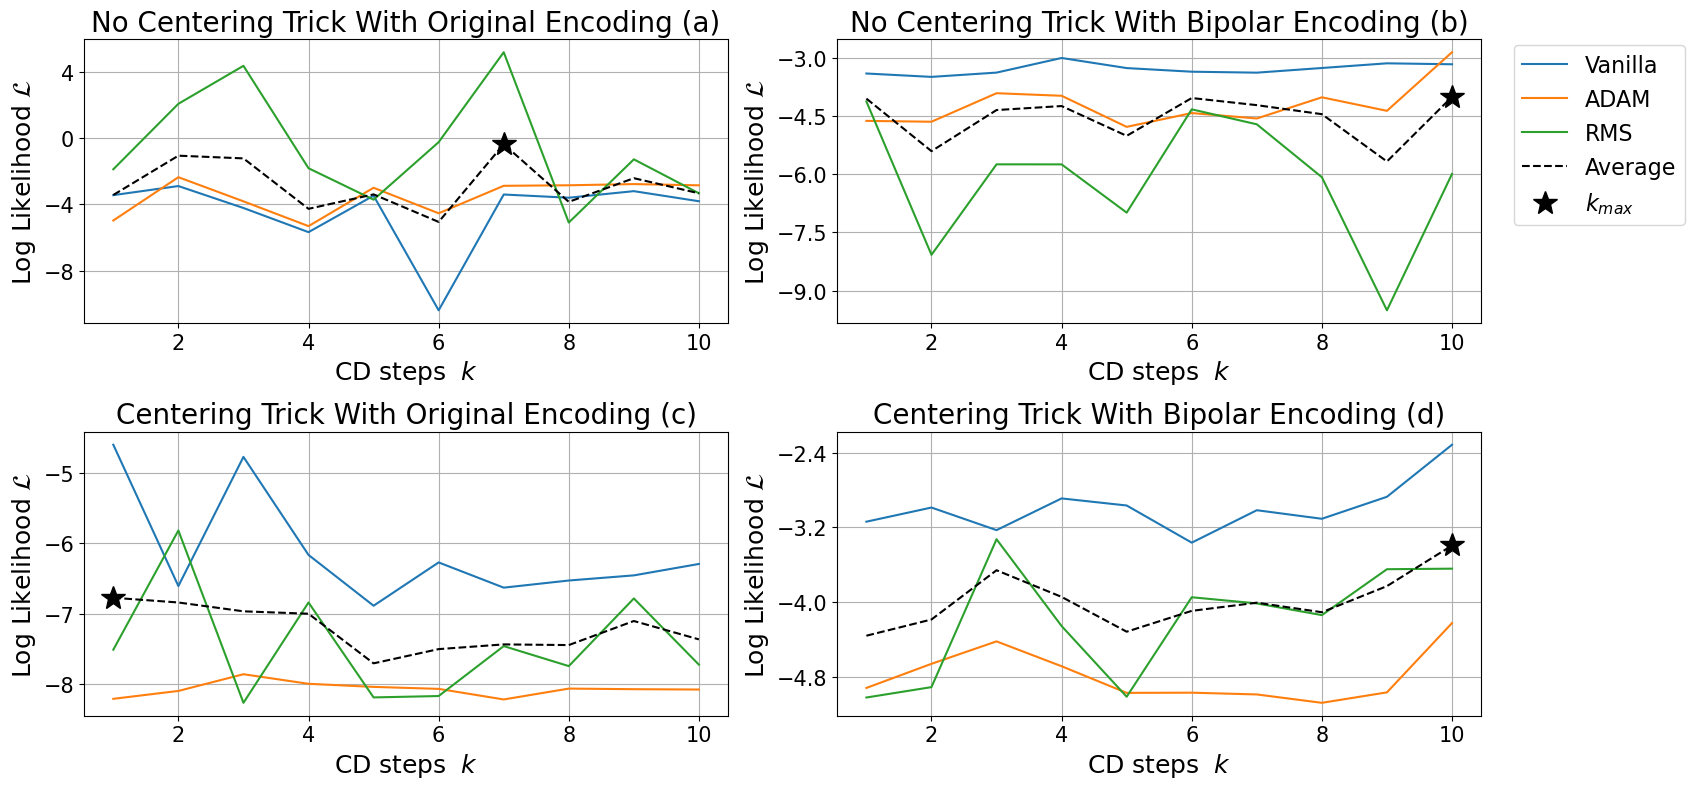

In [181]:
ax = axes[0][1] 
bmax = np.where(bcomb==np.max(bcomb))[0][0]
ax.plot(kk_list, max_log_b[0], label='Vanilla')
ax.plot(kk_list, max_log_b[1], label='ADAM')
ax.plot(kk_list, max_log_b[2], label='RMS')
ax.plot(kk_list,bcomb,'--k', label ='Average')
ax.plot(bmax+1,np.max(bcomb),'*k', label ='$k_{max}$',  markersize = 18)
ax.legend(fontsize = 16, bbox_to_anchor=(1.05,0.98),borderaxespad=0)
ax.set_ylabel('Log Likelihood $\mathcal{L}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('No Centering Trick With Bipolar Encoding (b)', size = 20)
ax.grid()
# plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)


ax = axes[1][0] 
cmax = np.where(ccomb==np.max(ccomb))[0][0]
ax.plot(kk_list, max_log_c[0], label='Vanilla')
ax.plot(kk_list, max_log_c[1], label='ADAM')
ax.plot(kk_list, max_log_c[2], label='RMS')
ax.plot(kk_list,ccomb,'--k', label ='Average')
ax.plot(cmax+1,np.max(ccomb),'*k', label ='$k_{max}$',  markersize = 18)
# ax.legend(fontsize = 16, bbox_to_anchor=(1.05,0.98),borderaxespad=0)
ax.set_ylabel('Log Likelihood $\mathcal{L}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('Centering Trick With Original Encoding (c)', size = 20)
ax.grid()
# plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)


ax = axes[1][1] 
dmax = np.where(dcomb==np.max(dcomb))[0][0]
ax.plot(kk_list, max_log_d[0], label='Vanilla')
ax.plot(kk_list, max_log_d[1], label='ADAM')
ax.plot(kk_list, max_log_d[2], label='RMS')
ax.plot(kk_list,dcomb,'--k', label ='Average')
ax.plot(dmax+1,np.max(dcomb),'*k', label ='$k_{max}$',  markersize = 18)
# ax.legend(fontsize = 16, bbox_to_anchor=(1.05,0.98),borderaxespad=0)
ax.set_ylabel('Log Likelihood $\mathcal{L}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('Centering Trick With Bipolar Encoding (d)', size = 20)
ax.grid()
# plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)


plt.savefig('all_log', dpi='figure', format=None, bbox_inches='tight', pad_inches=0.05)
fig.subplots_adjust(right=0.75)
plt.show()

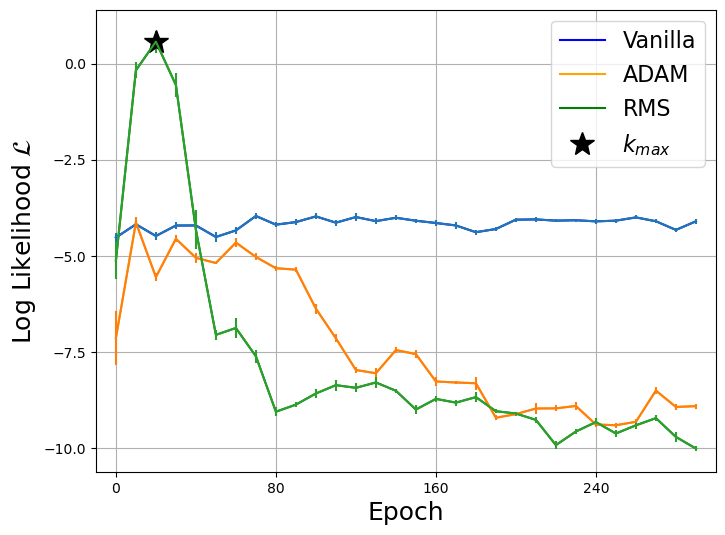

In [184]:
vanilla = np.loadtxt("ll_van_kk7_ep300_nc")
adam = np.loadtxt("ll_adam_kk7_ep300_nc")
rms = np.loadtxt("ll_rms_kk7_ep300_nc")
ax0 = 30
ax1 = 10

fig2, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
# vanilla
nadvan = np.array(vanilla).reshape(ax0,ax1)
eciavan = np.mean(nadvan,axis = 1)
r = np.std(nadvan,axis=1)/np.sqrt(ax1)
# print(ecia)

# plt.plot(Acc_tot[0::])
plt.plot(np.arange(ax0)*ax1,eciavan, label='Vanilla', color='blue')
plt.errorbar(np.arange(ax0)*ax1,eciavan,r)
# plt.yscale('log')
# plt.hlines(0.5, 0,ep)


# adam
nadadam = np.array(adam).reshape(ax0,ax1)
eciaadam = np.mean(nadadam,axis = 1)
r = np.std(nadadam,axis=1)/np.sqrt(ax1)
plt.plot(np.arange(ax0)*ax1,eciaadam, label='ADAM', color='orange')
plt.errorbar(np.arange(ax0)*ax1,eciaadam,r)



# rms
nadrms = np.array(rms).reshape(ax0,ax1)
eciarms = np.mean(nadrms,axis = 1)
r = np.std(nadrms,axis=1)/np.sqrt(ax1)

plt.plot(np.arange(ax0)*ax1,eciarms, label='RMS', color='green')
plt.errorbar(np.arange(ax0)*ax1,eciarms,r)
plt.plot(20,np.max(eciarms),'*k', label ='$k_{max}$',  markersize = 18)

ax.grid()
ax.set_xlim(-10,300)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylabel('Log Likelihood $\mathcal{L}$', size = 18)
ax.set_xlabel('Epoch', size = 18)
ax.legend(fontsize = 16)
# ax.set_aspect('equal')


plt.savefig('best_log', dpi='figure', format=None, bbox_inches='tight', pad_inches=0.05)